# Lệnh kubectl tương tác với Cluster
 - cú pháp chính: kubectl [command] [TYPE] [NAME] [flags]
 - trong đó:
   - [command] là lệnh, hành động như apply, get, delete, describe ...
   - [TYPE] kiểu tài nguyên như ns, no, po, svc ...
   - [NAME] tên đối tượng lệnh tác động
   - [flags] các thiết lập, tùy thuộc loại lệnh

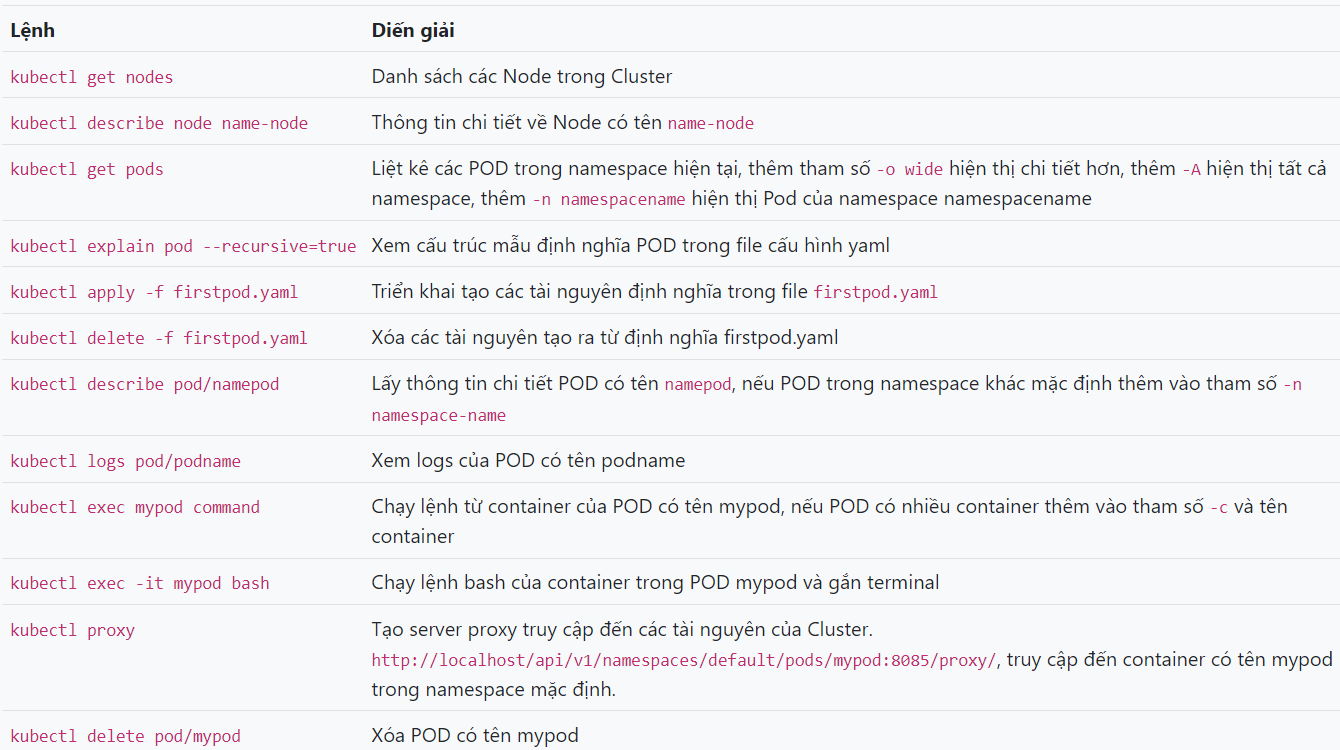